# Lab 1 Starter Code

To help you get started with your lab 1 analysis, here is a bit of code that you can adapt to do your analysis. 
I recommend to review the previous jupyter notebooks as well. 

In [1]:
# we need to import the pandas python package. This is the package that allows us to load and process tabular data (e.g. an Excel sheet or csv file)
import pandas as pd

There are several ways of getting data into google Colab. 

1. Upload a csv file to google Colab (I have already shown you how to do this).
2. You can enter the data directly. How to do this is shown below. 
3. Read data from a google sheet. See at the end 

In [2]:
# Create a pandas dataframe from measurements
# remember that {} indicates a python dictionary
data = {'MeasuredResistance_1':[1000.1, 999.5, 1000.4, 998.9], 'MeasuredResistance_2':[1000.4, 999.1, 1000.0, 998.8], 'MeasuredResistance_3':[1000.2, 999.4, 1000.4, 998.9]}
 
# Create DataFrame
df = pd.DataFrame(data)

df.head()

,MeasuredResistance_1,MeasuredResistance_2,MeasuredResistance_3
0,1000.1,1000.4,1000.2
1,999.5,999.1,999.4
2,1000.4,1000.0,1000.4
3,998.9,998.8,998.9


In [3]:
# Remember that we can calculate statistics like this. 
# Check out the pandas documentation to see what other statistical measures are available. 
df.min()

MeasuredResistance_1    998.9
MeasuredResistance_2    998.8
MeasuredResistance_3    998.9
dtype: float64

In [4]:
# as a standard pandas will calculate statistics for every column. 
# We can tell pandas to do this for every row instead
df.min(axis=1)

0    1000.1
1     999.1
2    1000.0
3     998.8
dtype: float64

In [5]:
# We can calculate the divination by doing some math and assigning it to a new column
df['Deviation'] = df['MeasuredResistance_1']-1000
df.head()

,MeasuredResistance_1,MeasuredResistance_2,MeasuredResistance_3,Deviation
0,1000.1,1000.4,1000.2,0.1
1,999.5,999.1,999.4,-0.5
2,1000.4,1000.0,1000.4,0.4
3,998.9,998.8,998.9,-1.1


<Axes: title={'center': 'title'}, xlabel='x', ylabel='y'>

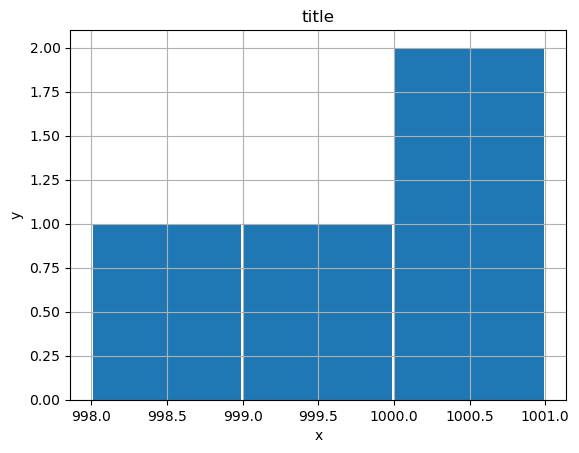

In [6]:
# a histogram can be calculated like this
# the width creates a small separation between columns 
df['MeasuredResistance_1'].plot(kind ='hist', bins = [998, 999,1000,1001], rwidth = 0.98, xlabel='x', ylabel = 'y', title = 'title', grid = True) 

In [7]:
# you can save a figure
import matplotlib.pyplot as plt
plt.savefig('figure.jpg')

# Fixed a typo (NOT: plt.save_fig)

<Figure size 640x480 with 0 Axes>

## How to get google sheets data into Colab

There is an extension available for google sheets, [Sheets to Colab](https://workspace.google.com/u/0/marketplace/app/sheets_to_colab/945625412720), which allows you to directly import data from Google Sheets into Colab from the Sheets UI. Follow the link to the Sheets to Colab Workspace Extension to learn more.

In [ ]:
# this is the code for some dummy data that I generated using the extension above. 
# this will not work for you, you will have to install the Colab extension and then do this for your own data 
# this code will only work when using google colab
import gspread
import pandas as pd
from google.auth import default
from google.colab import auth
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
spreadsheet = gc.open_by_key('1U_u6xDR00UdIdFMIjblB-MNZ2akGWWgW_45zEy2hKLI')
worksheet = spreadsheet.get_worksheet(0)
df = pd.DataFrame(worksheet.get())
# Code for making the first row as header. Remove if not needed.
df.columns = df.iloc[0]
df = df.drop(0)
df.head()